In [1]:
import scipy
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol, solve

In [2]:
t=0.8 # setting T/Tc
def pres(v): # defining a function for pressure 
    a=8*t/(3*v-1)-3/v**2
    return a

In [3]:
VP=0.35 # starting geuss for vapor pressure 
x = Symbol("x")
x1,x2,x3 = solve(pres(x)-VP,rational=False) # solving for the pionts the horizontal line crosses the isotherm
func=lambda x: pres(x) #making a function scipy can read 
mw=((x2-x1)*pres(x2))*(scipy.integrate.quad(func,x1,x2)[0])-((x3-x2)*pres(x2))*(scipy.integrate.quad(func,x2,x3)[0])
"""solving for area region A - region B as defined by the book this is the variable mw then I increase my guess for 
vapor pressure (VP) until the area is close enough to 0 
"""
while np.abs(mw) >=0.001:
    VP=VP+0.0001
    x = Symbol("x")
    func=8*t/(3*x-1)-3/x**2
    x1,x2,x3 = solve(func-VP,rational=False)
    func=lambda x: 8*t/(3*x-1)-3/x**2
    mw=(((x2-x1)*pres(x2))-(scipy.integrate.quad(func,x1,x2)[0]))-((scipy.integrate.quad(func,x2,x3)[0])-((x3-x2)*pres(x2)))
print("vapor pressure is", VP) 
print(" region A- region B", mw)

vapor pressure is 0.38309999999999633
 region A- region B -0.000956796318044628


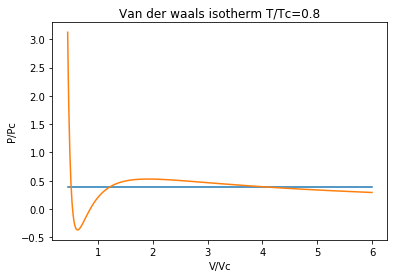

In [4]:
v=np.arange(.454,6,.01)
p=8*t/(3*v-1)-3/v**2
y=VP*(v/v)
plt.plot(v,y)
plt.plot(v,p)
plt.title('Van der waals isotherm T/Tc=0.8') 
plt.ylabel('P/Pc')
plt.xlabel('V/Vc')
plt.show()

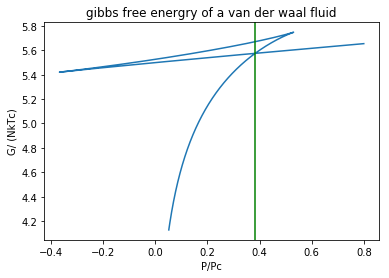

In [5]:
C=8
v=np.arange(0.5,40,.01)
p=8*t/(3*v-1)-3/v**2
g= -t*np.log(3*v-1)+t/(3*v-1)-9/(4*v)+C
plt.plot(p,g) # ploting gibbs free energy
plt.axvline(x=VP, color="green") #we can see is where the graph intersects itself at the determined vapor pressure 
plt.title('gibbs free energry of a van der waal fluid') 
plt.xlabel('P/Pc')
plt.ylabel('G/ (NkTc)')
plt.show()